In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

#### Apresentação inicial dos dados

In [2]:
df = pd.read_csv('Sales Data.csv')
df.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


#### Limpeza dos dados

In [3]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [4]:
df.dropna(inplace= True)


In [5]:
df.isnull().values.any()

False

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.drop(columns={'Unnamed: 0'}, inplace= True)

#### Ajustando informações da base de dados

In [8]:
# Traduzindo as variáveis para português
df = df.rename(columns={'Order ID': 'ID do pedido', 'Product': 'Produto', 'Quantity Ordered': 'Quantidade encomendada',
                   'Price Each': 'Preço unitário', 'Order Date': 'Data do pedido', 
                   'Purchase Address':'Endereço da compra',
                   'Month': 'Mês', 'Sales': 'Vendas', 'City': 'Cidade', 'Hour': 'Hora'})


In [9]:
# Alterando as informações das colunas Mês e Data do pedido 

meses_dict = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 
              7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
df['Mês'] = df['Mês'].replace(meses_dict)


In [10]:
# Transformando as variáveis da coluna Mês em variáveis categóricas
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
df['Mês'] = pd.Categorical(df['Mês'], categories=meses, ordered=True)
df['Mês']

0         Dezembro
1         Dezembro
2         Dezembro
3         Dezembro
4         Dezembro
            ...   
185945       Junho
185946       Junho
185947       Junho
185948       Junho
185949       Junho
Name: Mês, Length: 185950, dtype: category
Categories (12, object): ['Janeiro' < 'Fevereiro' < 'Março' < 'Abril' ... 'Setembro' < 'Outubro' < 'Novembro' < 'Dezembro']

In [11]:
# Transformado a coluna Data do pedido para o formato de data
df['Data do pedido'] = pd.to_datetime(df['Data do pedido'])
df.head()

,ID do pedido,Produto,Quantidade encomendada,Preço unitário,Data do pedido,Endereço da compra,Mês,Vendas,Cidade,Hora
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dezembro,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dezembro,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dezembro,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dezembro,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dezembro,11.95,Atlanta,12


### Pergunta 1: Qual foi o melhor mês para vendas? Quanto foi a quantidade adquirida neste mês?

In [12]:
vpm = df.groupby('Mês')['Vendas'].sum()
vpm = pd.DataFrame(vpm)





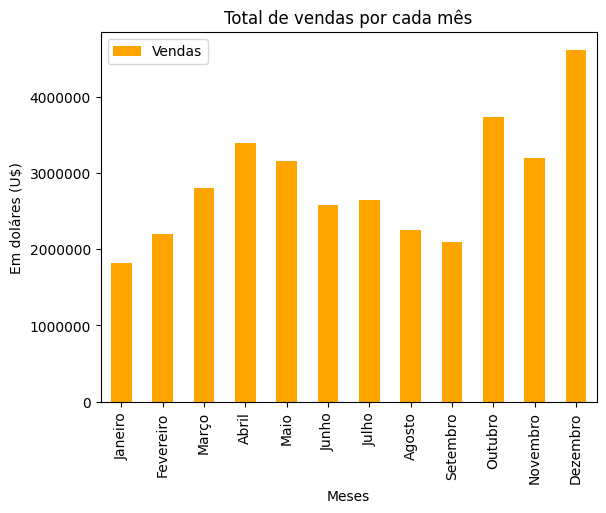

In [13]:
vpm.plot(kind='bar', color='orange')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Meses')
plt.ylabel('Em doláres (U$)')
plt.title('Total de vendas por cada mês')
plt.show()



##### O mês de dezembro foi o melhor mês para vendas com a quantidade de 4.613.443 dólares adquiridos.

### Pergunta 2: Qual cidade vendeu mais produtos? E qual vendeu menos produtos?

In [14]:
# Agrupando a quantidade de produtos vendidos por cada cidade.
city = df.groupby('Cidade')['Quantidade encomendada'].count()
city

Cidade
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: Quantidade encomendada, dtype: int64

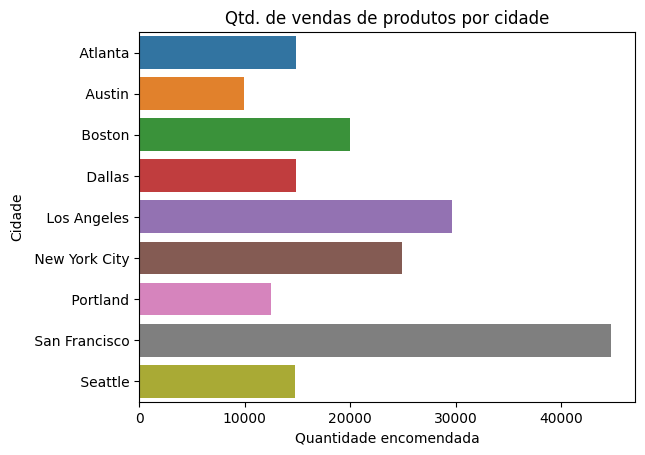

In [15]:
sns.barplot(y=city.index, x=city).set(title='Qtd. de vendas de produtos por cidade')
sns.set_palette('dark')


##### A cidade de San Francisco obteve a maior quantidade de vendas de produtos.
##### A cidade de Austin foi a que vendeu menos produtos.


### Pergunta 3: A que horas devemos exibir anúncios para maximizar a probabilidade de compra do produto pelo cliente?

In [16]:
# Criando a coluna Minuto para identificarmos a progressão do gráfico de linhas de maneira mais detalhada
df['Minuto'] = pd.to_datetime(df['Data do pedido']).dt.minute
df['Count'] = 1


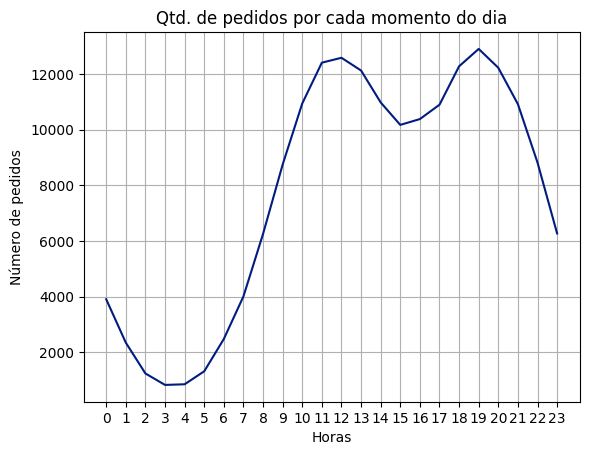

In [17]:
keys = [pair for pair, df in df.groupby('Hora')]

plt.plot(keys, df.groupby('Hora').count()['Count'])
plt.xticks(keys)
plt.xlabel('Horas')
plt.ylabel('Número de pedidos')
plt.title('Qtd. de pedidos por cada momento do dia')
plt.grid(True)
plt.show()


##### Percebe-se que das 10 horas manhã à 21 horas da noite o gráfico se mantém acima de 10 mil pedidos.
##### Portanto, recomendo que os anúncios sejam exibidos entre 10 horas da manhã e 21 horas da noite a fim de maximizar a probabilidade de compra.

### Pergunta 4: Quais produtos são vendidos juntos com mais frequência?

In [18]:
dfgroup = df[df['Data do pedido'].duplicated(keep=False)].copy()
dfgroup['Grouped'] = dfgroup.groupby('ID do pedido')['Produto'].transform(lambda x: ','.join(x))
dfgroup.head()


,ID do pedido,Produto,Quantidade encomendada,Preço unitário,Data do pedido,Endereço da compra,Mês,Vendas,Cidade,Hora,Minuto,Count,Grouped
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dezembro,11.95,New York City,18,21,1,USB-C Charging Cable
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dezembro,149.99,San Francisco,15,13,1,27in FHD Monitor
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dezembro,11.95,Atlanta,12,38,1,USB-C Charging Cable
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",Dezembro,11.96,Dallas,11,51,1,AAA Batteries (4-pack)
11,295676,ThinkPad Laptop,1,999.99,2019-12-28 17:19:00,"410 Lincoln St, Los Angeles, CA 90001",Dezembro,999.99,Los Angeles,17,19,1,ThinkPad Laptop


In [19]:
# Importando funções das bibliotecas itertools e collections para identificarmos quais produtos são vendidos
# simultaneamente com mais frequência.
from itertools import combinations
from collections import Counter

count = Counter()

for row in dfgroup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


In [20]:
# Transformando a lista em uma tabela
cp = count.most_common(10)
cpdf = pd.DataFrame(cp, columns=['Produtos combinados', 'Quantidade'])
cpdf.index += 1
cpdf



,Produtos combinados,Quantidade
1,"(iPhone, Lightning Charging Cable)",2140
2,"(Google Phone, USB-C Charging Cable)",2116
3,"(iPhone, Wired Headphones)",987
4,"(Google Phone, Wired Headphones)",949
5,"(iPhone, Apple Airpods Headphones)",799
6,"(Vareebadd Phone, USB-C Charging Cable)",773
7,"(Google Phone, Bose SoundSport Headphones)",503
8,"(USB-C Charging Cable, Wired Headphones)",452
9,"(Vareebadd Phone, Wired Headphones)",327
10,"(Lightning Charging Cable, Wired Headphones)",253


##### Na tabela acima, podemos ver os 10 produtos combinados mais vendidos, sendo o Iphone junto ao Lightining Charging Cable(Carregador), os mais vendidos.

### Pergunta 5: Qual produto vendeu mais? Por que você acha que vendeu mais?

Text(0.5, 1.0, 'Quantidade de vendas por produto')

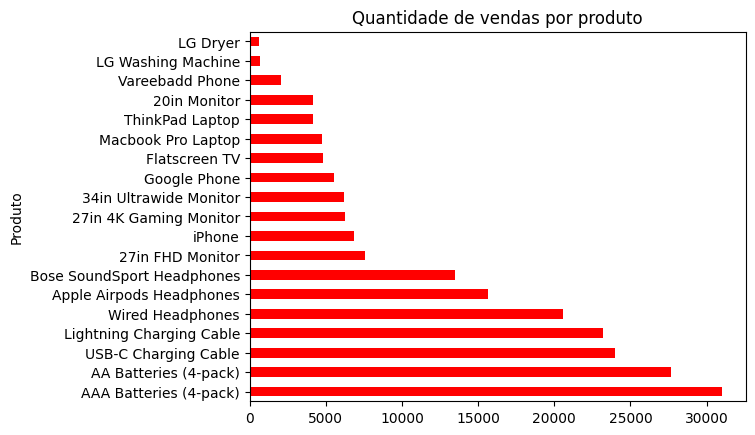

In [21]:
# Agrupando a quantidade de vezes total que cada produto foi vendido durante o ano e exibindo em um gráfico de barras
prod = df.groupby('Produto')['Quantidade encomendada'].sum()
prod.sort_values(ascending=False, inplace=True)
prod.plot(kind='barh', color='red')
plt.title('Quantidade de vendas por produto')

##### O produto mais vendido foi AAA Batteries (4-pack).

In [22]:
price = df[['Produto', 'Preço unitário']]
price.drop_duplicates().sort_values(by='Preço unitário').reset_index(drop=True).head()

,Produto,Preço unitário
0,AAA Batteries (4-pack),2.99
1,AA Batteries (4-pack),3.84
2,USB-C Charging Cable,11.95
3,Wired Headphones,11.99
4,Lightning Charging Cable,14.95


In [23]:
# Montando uma tabela onde exiba o nome do produto, quantas vezes foram vendidos e seu preço unitário
dfprice = pd.merge(prod, price, on="Produto")
dfprice.drop_duplicates().reset_index(drop=True)

,Produto,Quantidade encomendada,Preço unitário
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


[Text(0.5, 1.0, 'Relação entre a quantidade de vendas de um produto e seu preço individual')]

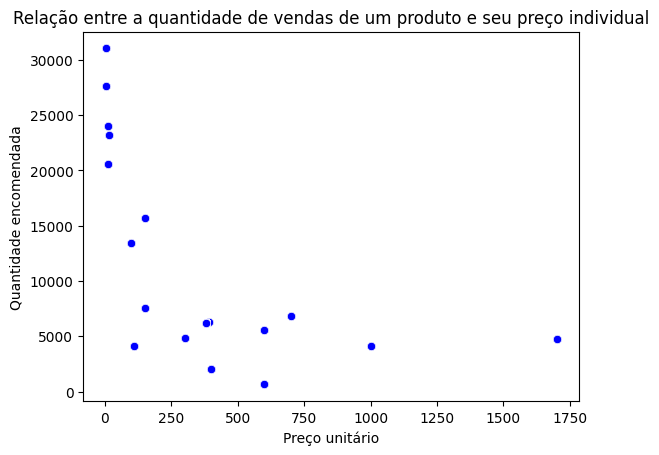

In [24]:
sns.scatterplot(y='Quantidade encomendada', x='Preço unitário', data=dfprice, color= 'blue') \
                .set(title='Relação entre a quantidade de vendas de um produto e seu preço individual')
                

##### Olhando o gráfico, percebe-se que há uma notável correlação entre a quantidade de vendas de um produto e seu preço, onde reparamos uma tendência de quanto mais barato o produto, mais ele será vendido. 

##### *Lembrando que o produto ser o mais vendido, não necessariamente, significa que ele foi o mais lucrativo.*